# ChoiEtAl2019-Fut-NSVh

### Title
Hyperbolic normal stochastic volatility model

### Authors
* Jaehyuk Choi ([@jaehyukchoi](https://github.com/jaehyukchoi))
* Chenru Liu
* Byoung Ki Seo

### Abstract
For option pricing models and heavy‐tailed distributions, this study proposes a continuous‐time stochastic volatility model based on an arithmetic Brownian motion: a one‐parameter extension of the normal stochastic alpha‐beta‐rho (SABR) model. Using two generalized Bougerol's identities in the literature, the study shows that our model has a closed‐form Monte Carlo simulation scheme and that the transition probability for one special case follows Johnson's SU distribution—a popular heavy‐tailed distribution originally proposed without stochastic process. It is argued that the SU distribution serves as an analytically superior alternative to the normal SABR model because the two distributions are empirically similar.

### Links
* [DOI](https://doi.org/10.1002/fut.21967) | [arXiv](https://arxiv.org/abs/1809.04035) | [SSRN](https://ssrn.com/abstract=3068836)

### Citation
Choi, J., Liu, C., & Seo, B. K. (2019). Hyperbolic normal stochastic volatility model. Journal of Futures Markets, 39(2), 186–204. https://doi.org/10.1002/fut.21967

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy as sp
import pandas as pd

### Uncomment below if you want to run on your own modified code
#import sys
#sys.path.insert(sys.path.index('')+1, 'D:/Github/pyfeng')
import pyfeng as pf

## Figure 3 (Left)

In [3]:
# Sig0: 0.00532743 0.00477
# Rho:  0.33503172 0.32244
# Vov:  0.61961777 0.62181

In [4]:
fwd = 2.0221/100
m_sabr = pf.SabrNormVolApprox(sigma=0.00532743, rho=0.33503172, vov=0.61961777)
m_nsvh = pf.Nsvh1(sigma=0.00477, rho=0.32244, vov=0.62181)

In [5]:
strike = np.arange(-50, 451, 10)/10000
vol0 = m_sabr.vol_for_price(strike, spot=fwd, texp=1)
vol1 = m_nsvh.vol_smile(strike, spot=fwd, texp=1)

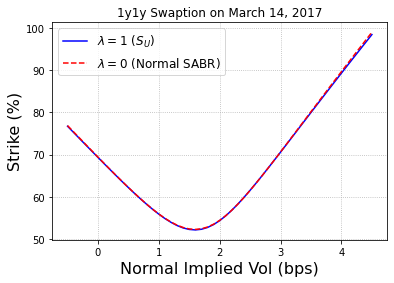

In [6]:
plt.plot(strike*100, vol1*10000, 'b-', label = '$\lambda=1$ ($S_U$)')
plt.plot(strike*100, vol0*10000, 'r--', label = '$\lambda=0$ (Normal SABR)')

plt.ylabel('Strike (%)', fontsize=16)
plt.xlabel('Normal Implied Vol (bps)', fontsize=16)
plt.title('1y1y Swaption on March 14, 2017')
plt.grid(linestyle=':')
plt.legend(fontsize=12)
plt.show()

## Figure 3 (Right)

In [7]:
# Sig0: 0.00691184 0.00609329
# Rho:  0.01696877 0.01579798
# Vov:  0.22372443 0.22196211

In [8]:
fwd = 3.0673/100
m_sabr = pf.SabrNormVolApprox(sigma=0.00691184, rho=0.01696877, vov=0.22372443)
m_nsvh = pf.Nsvh1(sigma=0.00609329, rho=0.01579798, vov=0.22196211)

In [9]:
strike = np.arange(50, 551, 10)/10000
vol0 = m_sabr.vol_for_price(strike, spot=fwd, texp=10)
vol1 = m_nsvh.vol_smile(strike, spot=fwd, texp=10)

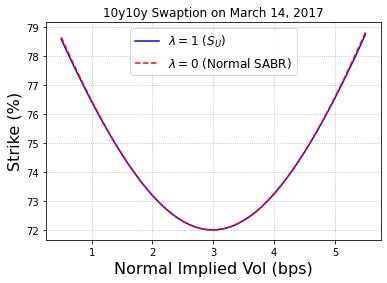

In [10]:
plt.plot(strike*100, vol1*10000, 'b-', label = '$\lambda=1$ ($S_U$)')
plt.plot(strike*100, vol0*10000, 'r--', label = '$\lambda=0$ (Normal SABR)')

plt.ylabel('Strike (%)', fontsize=16)
plt.xlabel('Normal Implied Vol (bps)', fontsize=16)
plt.title('10y10y Swaption on March 14, 2017')
plt.grid(linestyle=':')
plt.legend(fontsize=12)
plt.show()

## Table 4

In [11]:
fwd = 3.0673/100
strike = np.arange(-200, 301, 100)/10000

In [12]:
# Normal SABR (lam=0) Analytic Price
m_sabr = pf.SabrNormVolApprox(sigma=0.00691184, rho=0.01696877, vov=0.22372443)
p0 = m_sabr.price(fwd + strike, spot=fwd, texp=10)

In [13]:
# Johnson SU (lam=1) Analytic Price
p1 = m_nsvh.price(fwd + strike, spot=fwd, texp=10)
m_nsvh = pf.Nsvh1(sigma=0.00609329, rho=0.01579798, vov=0.22196211)

In [14]:
# Normal SABR (lam=0) MC Price
m_mc = pf.NsvhMc(sigma=0.00691184, rho=0.01696877, vov=0.22372443, lam=0)
m_mc.set_num_params(n_path=1e6, rn_seed=1234)
p0mc = np.zeros((100, len(strike)))
for k in range(100):
    p0mc[k,] = m_mc.price(fwd + strike, spot=fwd, texp=10)

p0bias = np.mean(p0mc, axis=0) - p0
p0std = np.std(p0mc, axis=0)

In [15]:
m_mc = pf.NsvhMc(sigma=0.00609329, rho=0.01579798, vov=0.22196211, lam=1)
m_mc.set_num_params(n_path=16e4, rn_seed=1234)
p1mc = np.zeros((100, len(strike)))
for k in range(100):
    p1mc[k,] = m_mc.price(fwd + strike, spot=fwd, texp=10)

p1bias = np.mean(p1mc, axis=0) - p1
p1std = np.std(p1mc, axis=0)

In [16]:
pd.DataFrame(np.array([strike*10000, p0, p0bias, p0std, p1, p1bias, p1std]).T, 
             columns = ['$K$ - $F$ (bps)', '($\lambda=0$) $P_{ANA}$ ', 'MC Bias', 'MC Std',
                        '($\lambda=1$) $P_{ANA}$', 'MC Bias', 'MC Std'
                       ])

,$K$ - $F$ (bps),($\lambda=0$) $P_{ANA}$,MC Bias,MC Std,($\lambda=1$) $P_{ANA}$,MC Bias,MC Std
0,-200.0,0.022746,-0.000043,0.000007,0.022743,4.557349e-07,0.000018
1,-100.0,0.015064,-0.000022,0.000009,0.015064,-1.288965e-08,0.000022
2,0.0,0.009083,-0.000012,0.000010,0.009083,-2.082307e-07,0.000024
3,100.0,0.005108,-0.000027,0.000009,0.005108,1.971182e-07,0.000022
4,200.0,0.002807,-0.000049,0.000007,0.002804,7.862807e-07,0.000018
5,300.0,0.001567,-0.000060,0.000005,0.001559,6.650194e-07,0.000013


## Table 5

In [17]:
# S&P500
var, skew, exkurt = 1.515404709, -0.09333602, 11.44538392
m1 = pf.Nsvh1(1)
print( 'sig0, vov, rho =', np.round(m1.calibrate_vsk(var, skew, exkurt, setval=True), 5)*100 )
assert np.all(np.isclose(m1.moments_vsk(), (var, skew, exkurt)))

sig0, vov, rho = [82.538 84.587 -1.725]


In [18]:
# China CSI 300
m2, skew, exkurt = 3.409239201, -0.50753448, 3.334842258
m1 = pf.Nsvh1(1)
print( 'sig0, vov, rho =', np.round(m1.calibrate_vsk(var, skew, exkurt, setval=True), 5)*100 )
assert np.all(np.isclose(m1.moments_vsk(), (var, skew, exkurt)))

sig0, vov, rho = [100.118  61.853 -18.539]
